In [196]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import numpy as np

In [8]:
conn = lite.connect('flatmates_data.db')

In [353]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df = pd.read_sql_query(query,conn)
len(df)

2709

## Most Expensive Rental Suburbs in Melbourne


In [338]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,East Melbourne,7,312
1,Toorak,11,282
2,Prahran,21,281
3,St Kilda,52,276
4,South Melbourne,7,276
5,Port Melbourne,19,270
6,South Yarra,26,268
7,Mentone,7,266
8,Saint Kilda,9,264
9,Elsternwick,9,258


## Most Expensive Rental Suburbs in Melbourne With More Houses


In [339]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Prahran,21,281
1,St Kilda,52,276
2,South Yarra,26,268
3,Brunswick East,25,250
4,West Melbourne,22,248
5,Southbank,60,248
6,Melbourne,119,239
7,Richmond,52,235
8,Northcote,26,234
9,Abbotsford,29,232


## Most Popular Rental Suburbs in Melbourne 


In [340]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE NOT house_type = "Student Accommodation"
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY rooms_available DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Clayton,118,147
1,Melbourne,108,240
2,Southbank,60,248
3,Carlton,60,252
4,Brunswick,54,231
5,St Kilda,52,276
6,Richmond,52,235
7,Footscray,46,208
8,Point Cook,44,158
9,Bundoora,43,121


Excluding student accomodation, it's likely that there is still some student places in here. People probably don't apply the right label when posting.

The reason why I am suspicious is that Clayton is quite far away from the city, and surrounds the Monash University. Carlton is also next to the University of Melbourne.

## Cheapest Rental Suburbs in Melbourne

In [341]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Mambourin,8,55
1,Yarrambat,8,75
2,Sunshine North,15,79
3,Broadmeadows,8,92
4,Cranbourne,7,93
5,Wheelers Hill,6,96
6,Clyde,13,103
7,Balwyn,11,105
8,Wantirna South,15,110
9,Rockbank,6,112


## Cheapest Rental Suburbs in Melbourne with More Listings

In [342]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Bundoora,44,124
1,Brunswick West,26,128
2,St Albans,23,133
3,Mulgrave,24,134
4,Burwood,41,135
5,Clayton,135,149
6,Frankston,44,150
7,Caulfield North,23,153
8,Tarneit,24,153
9,Reservoir,31,154


## Least Rental Listing Suburbs in Melbourne

In [343]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
ORDER BY rooms_available  
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Aspendale,1,300
1,Bacchus Marsh,1,150
2,Baxter,1,280
3,Belgrave South,1,100
4,Botanic Ridge,1,230
5,Briar Hill,1,280
6,Brooklyn,1,250
7,Burnside,1,200
8,Coldstream,1,150
9,Coolaroo,1,160


## Room Types Available in Melboure

In [344]:
query = """SELECT house_type, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY house_type 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)

In [345]:
df

,house_type,rooms_available,average_price
0,Bed for rent,31,376
1,Studio for rent,37,363
2,Flatshare,611,229
3,Homestay,58,211
4,Whole Property for rent,257,194
5,Share House,2193,174
6,Student Accommodation,133,151


In [346]:
query = """SELECT people_count, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY people_count 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)

## Cost Per Room with Other People 

In [347]:
df

,people_count,rooms_available,average_price
0,0,325,231
1,2,694,212
2,1,728,206
3,3,725,179
4,4,433,158
5,7,152,142
6,6,98,138
7,5,165,137


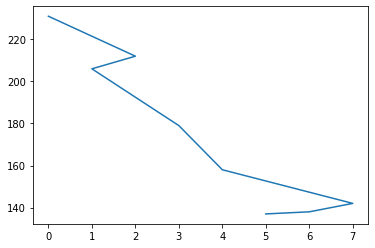

In [348]:
plt.plot(df['people_count'],df['average_price'])
plt.show()

Clear down trend here, more people in your house means you pay less

# Deep Dive - Richmond

Richmond is where I live and it has a decent amount of listings. Let's dive a little deeper and try to make some colourful charts!

In [349]:
SELECTED_SUBURB = "Richmond"

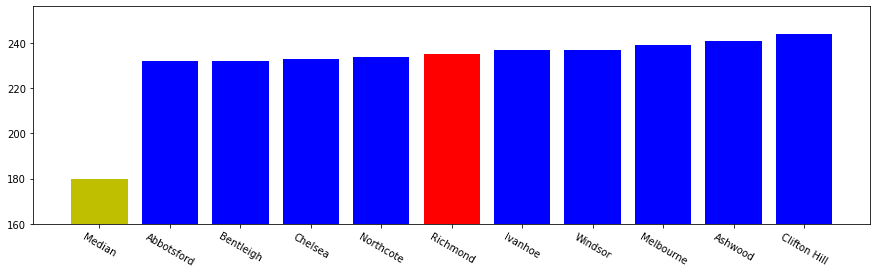

In [350]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price DESC 
"""
f, ax = plt.subplots(1)
df = pd.read_sql_query(query,conn)
ind = df[df['suburb']==SELECTED_SUBURB].index[0]

similar_burbs = df.iloc[ind-5:ind+5]
similar_burbs = similar_burbs.iloc[::-1]
similar_burbs.loc[len(similar_burbs.index)] = ["Median",1,df['average_price'].median()]
similar_burbs = similar_burbs.sort_values(by='average_price')

colours = []
for i in similar_burbs['suburb']:
    if i == SELECTED_SUBURB: colours.append('r')
    elif i == "Median": colours.append('y')
    else: colours.append('b')
ax.bar(similar_burbs['suburb'],similar_burbs['average_price'],color=colours)
low_axis = min(similar_burbs['average_price'])-20
high_axis = max(similar_burbs['average_price'])+20
ax.set_ylim(bottom=low_axis)
plt.xticks(rotation=330)
f.set_figwidth(15)
plt.show(f)

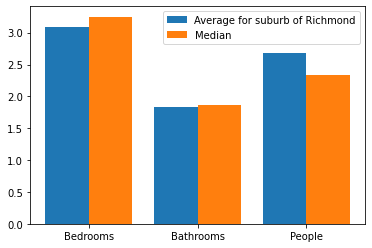

In [351]:
query = """SELECT AVG(bedroom_count) as be , AVG(bathroom_count) as ba, AVG(people_count) as pp, suburb
FROM flatmates_rent_listings 
GROUP BY suburb
"""
# link to create these kinds of charts
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
f, ax = plt.subplots(1)

# needed to offset the bars
bar_width = 0.4

# read data
df = pd.read_sql_query(query,conn)

# find index of my suburb
ind = df[df['suburb']==SELECTED_SUBURB].index[0]

# x axis
x = np.arange(1,4)

# get data for this suburb and the median
y_sub = [df.iloc[ind][0],df.iloc[ind][1],df.iloc[ind][2]]
y_med = [df['be'].median(),df['ba'].median(),df['pp'].median()]

# add this data to 2 seperate bar charts
b1 = ax.bar(x,y_sub,width=bar_width, label='Average for suburb of ' + str(SELECTED_SUBURB))
b2 = ax.bar(x + bar_width, y_med,
            width=bar_width,label="Median")

# we have to add the labels now
labs = ["Bedrooms", "Bathrooms", "People"]
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labs)

ax.legend()

plt.show(f)

/var/folders/y5/lyr7l8ds5mbb60cw701w_7vh0000gn/T/ipykernel_67449/4187190365.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians.append(df[df['house_type'] ==str(t)].median())
/var/folders/y5/lyr7l8ds5mbb60cw701w_7vh0000gn/T/ipykernel_67449/4187190365.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians.append(df[df['house_type'] ==str(t)].median())
/var/folders/y5/lyr7l8ds5mbb60cw701w_7vh0000gn/T/ipykernel_67449/4187190365.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduct

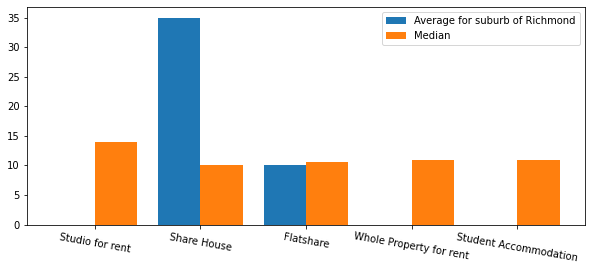

In [352]:
query = """SELECT house_type, suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
GROUP BY house_type,suburb
HAVING SUM(rooms_available)  > 5
ORDER BY average_price DESC 
"""
df = pd.read_sql_query(query,conn)
types = df.house_type.unique()
medians = []
for t in types:
    medians.append(df[df['house_type'] ==str(t)].median())

median_type_counts = [i[0] for i in medians]

f, ax = plt.subplots(1)

# needed to offset the bars
bar_width = 0.4

# find data of my suburb
suburb_data = df[df['suburb']==SELECTED_SUBURB]

# x axis
x = np.arange(len(types))

suburb_stats = [0 for i in range(len(medians))]

for index,row in suburb_data.iterrows():
    c = 0
    for t in types:
        if row['house_type'] == t:
            suburb_stats[c] = row['rooms_available']
        c += 1
            
# add this data to 2 seperate bar charts
b1 = ax.bar(x,suburb_stats,width=bar_width, label='Average for suburb of ' + str(SELECTED_SUBURB))
b2 = ax.bar(x + bar_width, median_type_counts,
            width=bar_width,label="Median")

# we have to add the labels now
labs = types
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labs)

ax.legend()
plt.xticks(rotation=350)
f.set_figwidth(10)

plt.show(f)